In [8]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
%matplotlib inline

(-0.1, 2.0)

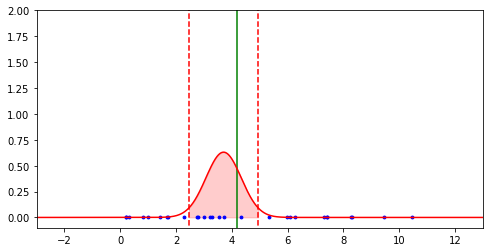

In [3]:
# generating parameters of ground truth
np.random.seed(1)
mu_tru = 10 * np.random.rand()
std_tru =  5 * np.random.rand()

# generating samples
n_smp = 30
x = np.random.normal(mu_tru, std_tru, n_smp)
mu_smp = x.mean()
std_smp = x.std() / np.sqrt(n_smp - 1)
xs = np.arange(-5, 15, 0.01)
gs_smp = spst.norm(mu_smp, std_smp).pdf(xs)

# confidence interval based on samples
ci_smp = mu_smp + std_smp * spst.norm.ppf([0.025, 0.975])
xci_smp = np.arange(ci_smp[0], ci_smp[1], 0.01)
gs_ci_smp = spst.norm(mu_smp, std_smp).pdf(xci_smp)

plt.rcParams['figure.figsize'] = (8.0,  4.0)
plt.vlines(mu_tru, -1, 4., color='g')
#plt.plot(xs, gs_tru, color='g')
#plt.fill_between(xci_tru, gs_ci_tru, color=(0, 1, 0), alpha=0.2)
#plt.vlines(ci_tru[0], -1, 1, color='g', linestyles='dashed')
#plt.vlines(ci_tru[1], -1, 1, color='g', linestyles='dashed')

#plt.vlines(mu_smp, -1, 1, color='r')
plt.plot(xs, gs_smp, color='r')
plt.fill_between(xci_smp, gs_ci_smp, color=(1, 0, 0), alpha=0.2)
plt.vlines(ci_smp[0], -1, 4., color='r', linestyles='dashed')
plt.vlines(ci_smp[1], -1, 4., color='r', linestyles='dashed')

plt.scatter(x, np.zeros(n_smp), s=8, c='b')
plt.xlim((-3., 13.))
plt.ylim((-0.1, 2.0))

In [10]:
spst.sem(x[0])

0.0048739737543716261

In [15]:
x[0].std() / np.sqrt(x[0].shape[0] - 1)

0.0048739737543716261

average: 0.95021


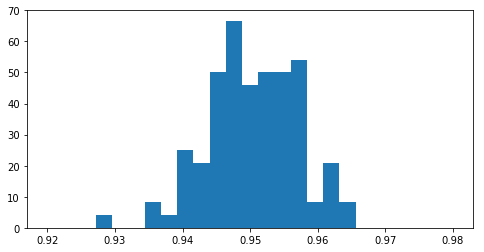

In [89]:
# generating samples
n_iter = 100
n_smp = 123
n_ens = 1234

ratio = np.zeros(n_iter)
for seed in range(n_iter):
    np.random.seed(seed + 987654321)
    mu_tru = 10 * np.random.rand()
    std_tru =  3 * np.random.rand()

    x = np.random.normal(mu_tru, std_tru, (n_ens, n_smp))
    mu_smp = x.mean(axis=1, keepdims=1)
    se_smp = x.std(axis=1, keepdims=1) / np.sqrt(n_smp - 1)

    #ci_smp = mu_smp + se_smp * spst.norm.ppf([0.025, 0.975])
    h = spst.t.ppf((1 + 0.95) / 2, n_smp - 1)
    ci_smp = mu_smp + se_smp * np.array([-h, h])
    ratio[seed] = ((ci_smp[:, 0] <= mu_tru) * (ci_smp[:, 1] >= mu_tru)).mean()
    #print('ratio: {:1.5f}'.format(ratio[seed]))

plt.rcParams['figure.figsize'] = (8.0,  4.0)
plt.hist(ratio, bins=25, range=(0.92, 0.98), normed=True)
print('average: {:1.5f}'.format(ratio.mean()))

In [44]:
spst.norm.ppf([0.025, 0.975])

array([-1.95996398,  1.95996398])

In [52]:
spst.sem(x[0])

0.15643324797743577

In [57]:
x[0].std()/np.sqrt(n_smp - 1)

0.15643324797743577

In [62]:
se*spst.t.ppf((1+0.95)/2, n_smp-1)

NameError: name 'se' is not defined

In [80]:
spst.t.ppf((1+0.95)/2, 698)

1.9633684547051231